<a href="https://colab.research.google.com/github/M1RZAB4IG/Brain-Tumor-Classification-Headstarter-AI-Accelerator/blob/main/Headstarter_Accelerator_AI_Project_2_Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 91% 135M/149M [00:01<00:00, 171MB/s]
100% 149M/149M [00:01<00:00, 136MB/s]


In [ ]:
def get_class_paths(path):
  classes = []
  class_paths = []

  # Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    # Check if it's a directory
    if os.path.isdir(label_path):
      # Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        # Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)

  # Create a DataFrame with the collected data
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [ ]:
tr_df = get_class_paths("/content/Training")

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/glioma/Tr-gl_0763.jpg,glioma
1,/content/Training/glioma/Tr-gl_0108.jpg,glioma
2,/content/Training/glioma/Tr-gl_0861.jpg,glioma
3,/content/Training/glioma/Tr-glTr_0006.jpg,glioma
4,/content/Training/glioma/Tr-gl_0477.jpg,glioma
...,...,...
5707,/content/Training/notumor/Tr-no_1035.jpg,notumor
5708,/content/Training/notumor/Tr-no_1404.jpg,notumor
5709,/content/Training/notumor/Tr-no_0239.jpg,notumor
5710,/content/Training/notumor/Tr-no_0821.jpg,notumor


In [ ]:
ts_df = get_class_paths("/content/Testing")

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/glioma/Te-gl_0148.jpg,glioma
1,/content/Testing/glioma/Te-gl_0210.jpg,glioma
2,/content/Testing/glioma/Te-gl_0201.jpg,glioma
3,/content/Testing/glioma/Te-gl_0257.jpg,glioma
4,/content/Testing/glioma/Te-glTr_0003.jpg,glioma
...,...,...
1306,/content/Testing/notumor/Te-no_0116.jpg,notumor
1307,/content/Testing/notumor/Te-no_0179.jpg,notumor
1308,/content/Testing/notumor/Te-no_0292.jpg,notumor
1309,/content/Testing/notumor/Te-no_0281.jpg,notumor


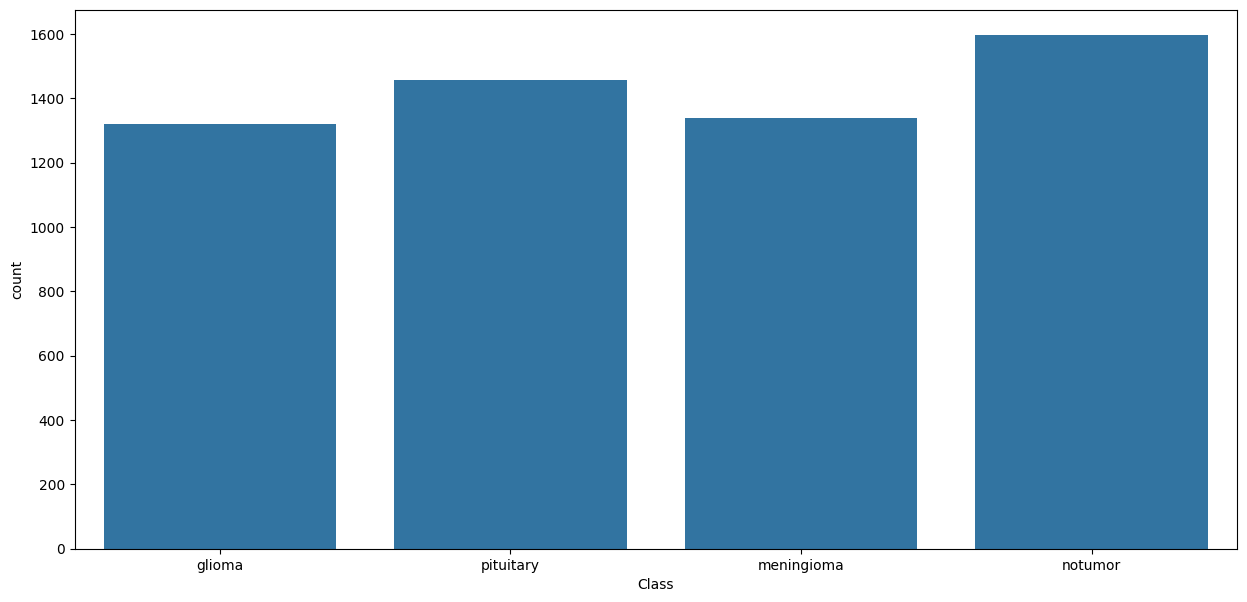

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

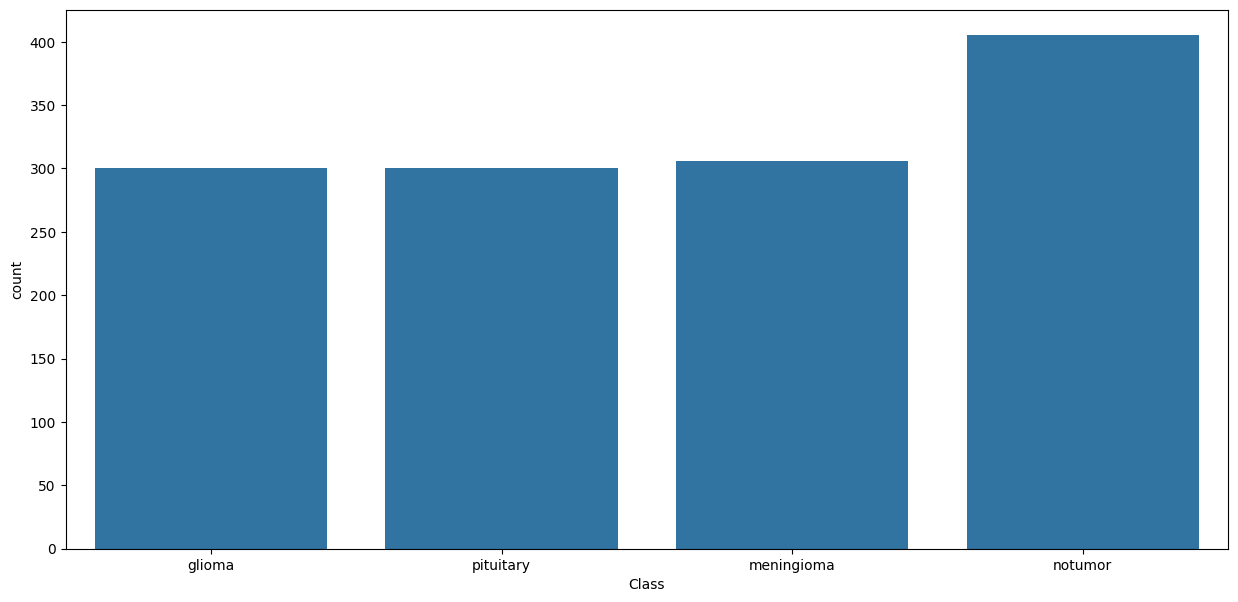

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
valid_df, ts_df = train_test_split(ts_df, test_size=0.5, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
983,/content/Testing/notumor/Te-no_0274.jpg,notumor
618,/content/Testing/meningioma/Te-me_0305.jpg,meningioma
1040,/content/Testing/notumor/Te-no_0153.jpg,notumor
303,/content/Testing/pituitary/Te-pi_0208.jpg,pituitary
320,/content/Testing/pituitary/Te-pi_0015.jpg,pituitary
...,...,...
755,/content/Testing/meningioma/Te-me_0299.jpg,meningioma
390,/content/Testing/pituitary/Te-pi_0239.jpg,pituitary
430,/content/Testing/pituitary/Te-pi_0095.jpg,pituitary
1265,/content/Testing/notumor/Te-no_0101.jpg,notumor


In [ ]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                              y_col='Class',
                                              batch_size = batch_size,
                                              target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                              y_col='Class',
                                              batch_size = batch_size,
                                              target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                              y_col='Class',
                                              batch_size = 16,
                                              target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


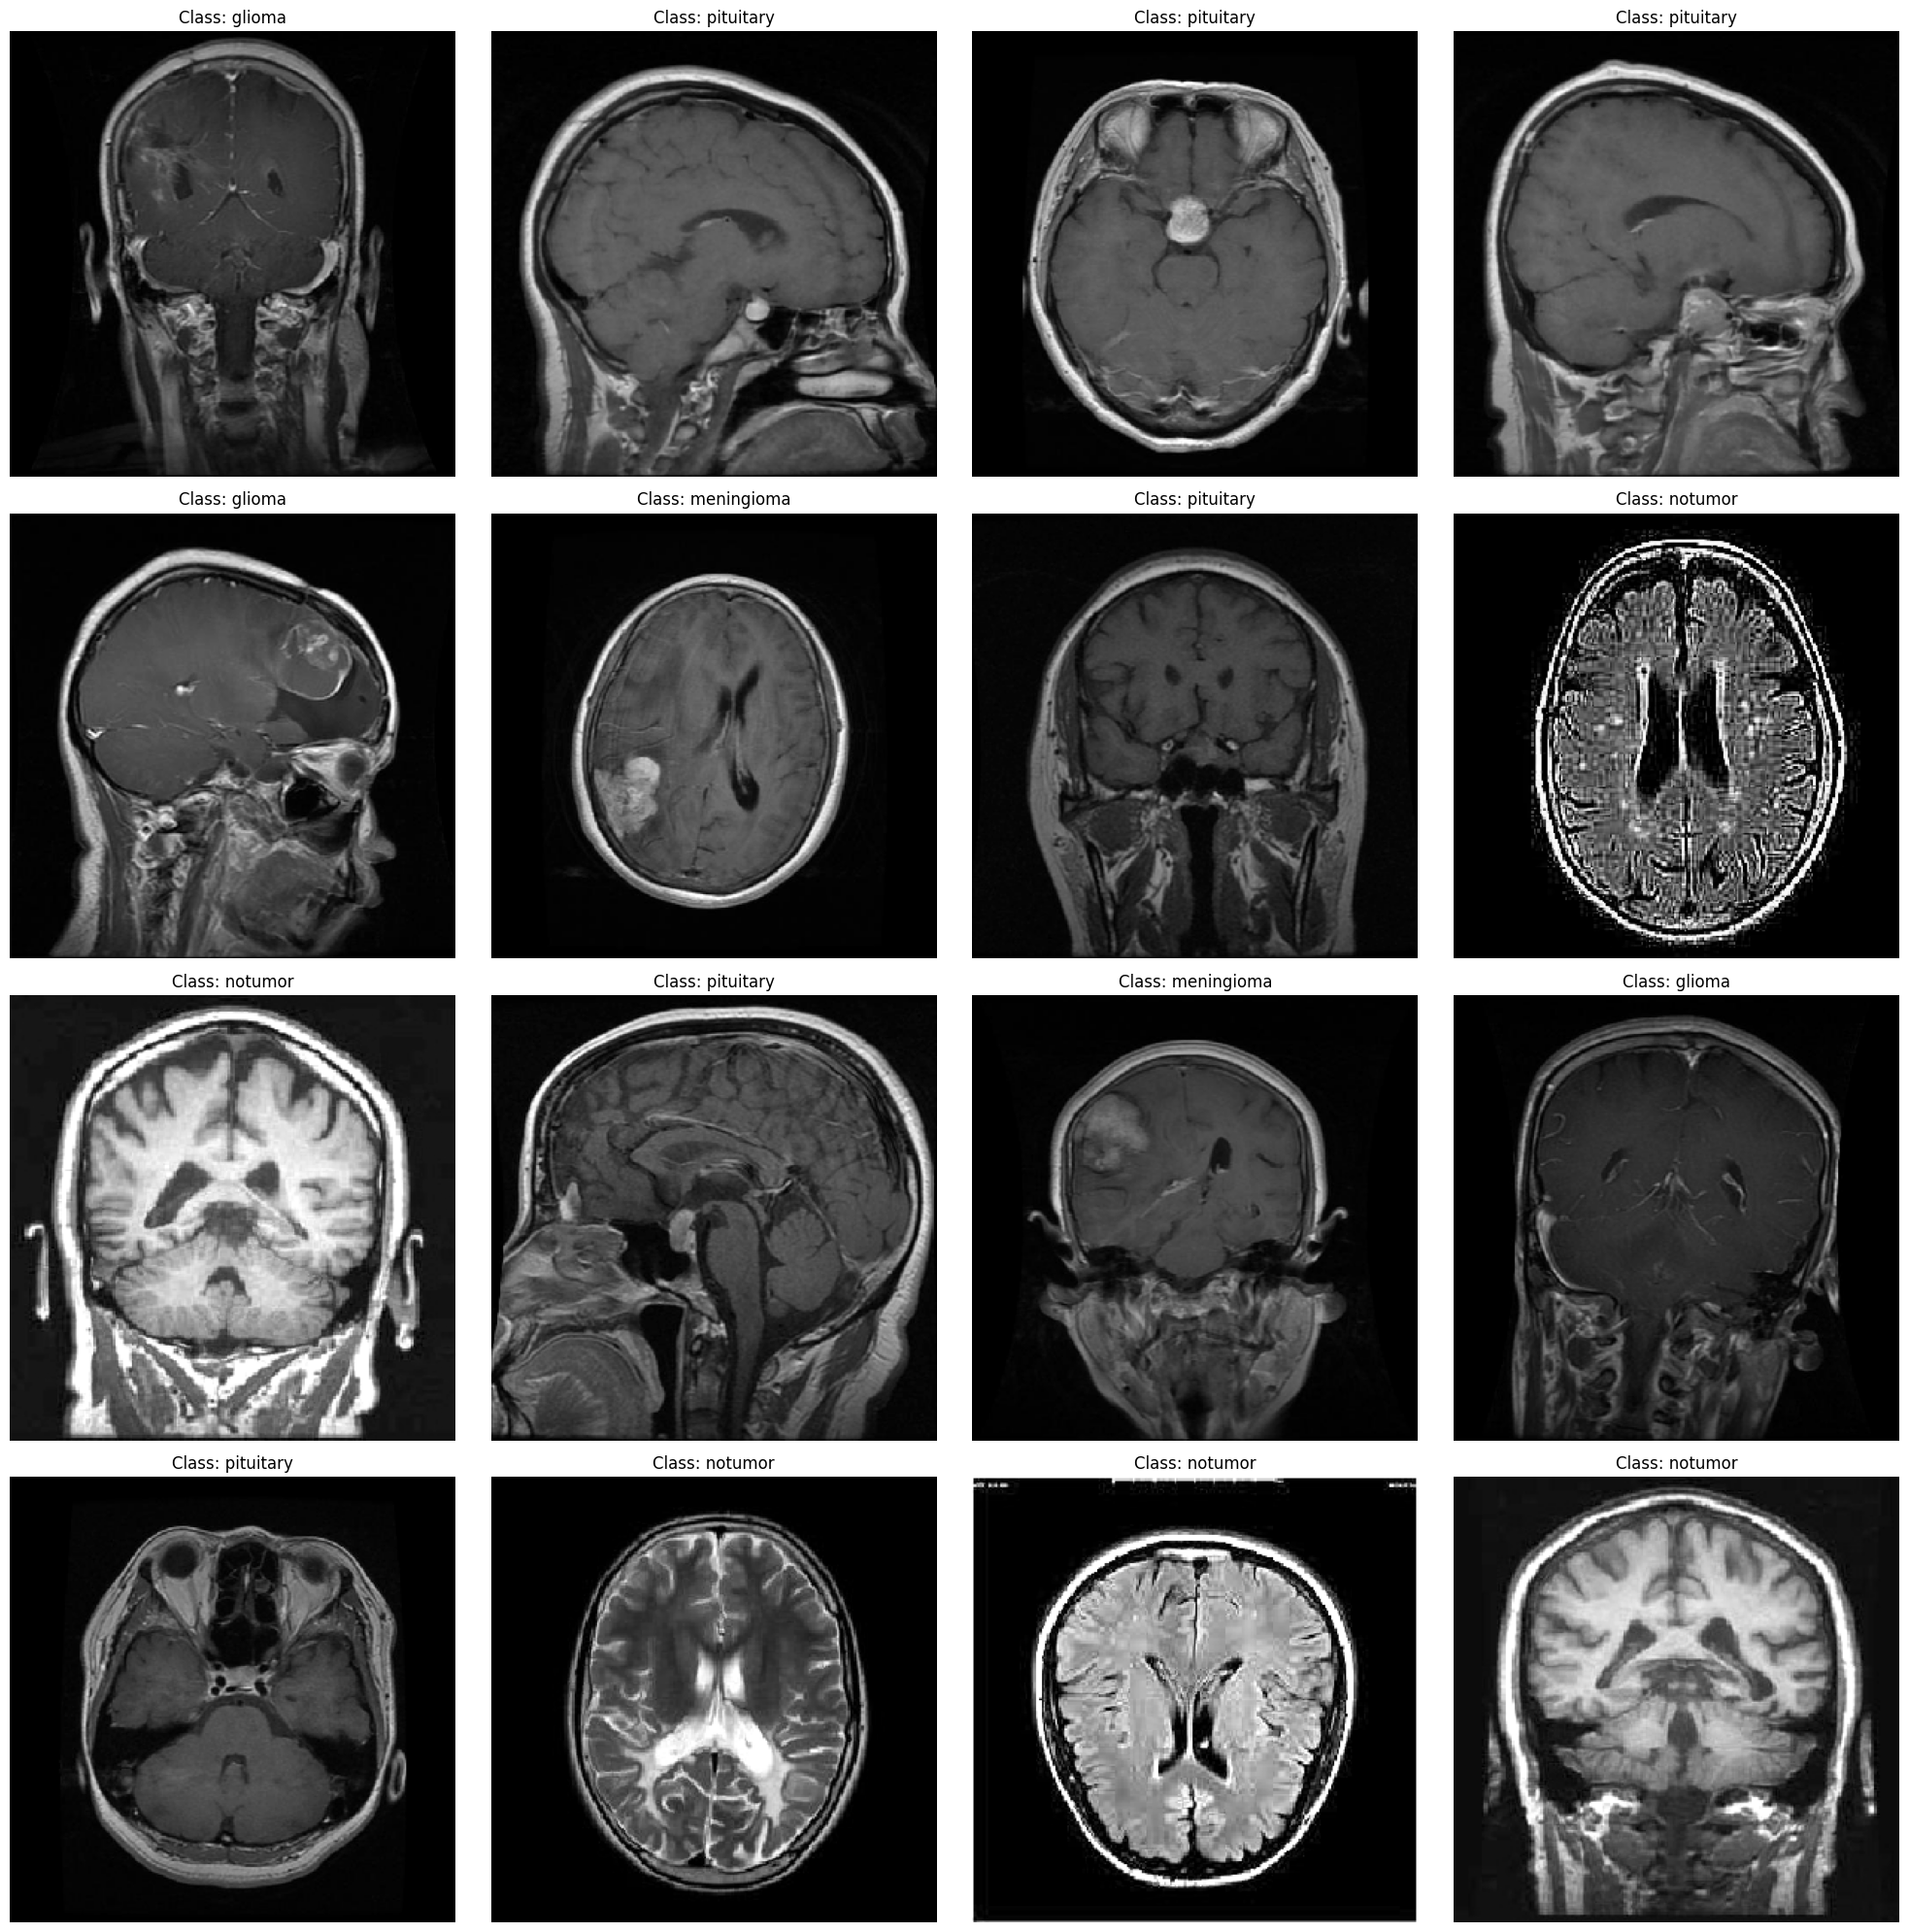

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(16):
      plt.subplot(4, 4, i+1)
      batch = next(tr_gen)
      image = batch[0][0]
      label = batch[1][0]
      plt.imshow(image)

      #Get the class index
      class_index = np.argmax(label)

      #Get the list of class names and class indices
      class_names = list(tr_gen.class_indices.keys())
      class_indices = list(tr_gen.class_indices.values())

      #Find the index of the class_index in the list of indices
      index_position = class_indices.index(class_index)

      #Get the class name using the index position
      class_name = class_names[index_position]

      plt.title(f"Class: {class_name}")
      plt.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top =False,
                                            weights ='imagenet',
                                            input_shape = img_shape,
                                            pooling = 'max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate = 0.3),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(4, activation='softmax')
])

In [ ]:
model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy',
              Precision(),
              Recall()])

In [ ]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 88/179 ━━━━━━━━━━━━━━━━━━━━ 1:41:33 67s/step - accuracy: 0.6315 - loss: 1.0691 - precision_1: 0.7550 - recall_1: 0.4366

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

#Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

#Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


NameError: name 'hist' is not defined

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss:{test_score[0]:.4f}")

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from PIL import Image

def predict(img_path: str) -> None:
  #Get class labels
  labels = list(class_dict.keys())

  #Create figure
  plt.figure(figsize=(6, 8))

  #Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  #Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  #Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = labels[predicted_class_idx]

  #Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  #Plot prediction probabilities
  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  #Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")




In [ ]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

NameError: name 'model' is not defined

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [ ]:
batch_size = 16

img_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                              y_col='Class',
                                              batch_size = batch_size,
                                              target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                              y_col='Class',
                                              batch_size = batch_size,
                                              target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                              y_col='Class',
                                              batch_size = 16,
                                              target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
# Create a Sequential Model

cnn_model = Sequential()

# Convolutional layers
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224,224,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(Dropout(0.25))


# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))

# Compile the model
cnn_model.compile(Adamax(learning_rate = 0.001), loss='categorical_crossentropy', metrics= ['accuracy', Precision(),Recall()])

# Display the model summary
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      12,845,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,409,412 (54.97 MB)

 Trainable params: 14,409,412 (54.97 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 63/357 ━━━━━━━━━━━━━━━━━━━━ 2:46:16 34s/step - accuracy: 0.3905 - loss: 3.7338 - precision: 0.4757 - recall: 0.0816

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

#Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

#Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss:{test_score[0]:.4f}")

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

In [ ]:
cnn_model.save("cnn_model.h5")

Part 2: Streamlit Web App


In [ ]:
! pip install streamlit pyngrok python-dotenv


In [ ]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata


In [ ]:
from google.colab import userdata

ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

NameError: name 'ngrok' is not defined

In [ ]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [ ]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_dotenv
load_dotenv()

def load_xception_model(model_path):
  img_shape=(299,299,3)
  base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet",
                                              input_shape=img_shape, pooling='max')

  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128, activation='relu'),
      Dropout(rate=0.25),
      Dense(4, activation='softmax')
  ])

  model.build((None,) + img_shape)

  # Compile the model
  model.compile(Adamax(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy',
                         Precision(),
                         Recall()])

  model.load_weights(model_path)

  return model


st.title("Brain Tumor Classification")

st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg","jpeg","png"])

if uploaded_file is not None:

  selected_model = st.radio(
      "Select Model",
      ("Transfer Learning - Xception", "Custom CNN")
  )

  if selected_model == "Transfer Learning - Xception":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size = (299, 299)
  else:
    model = load_model('/content/cnn_model.h5')
    img_size = (224, 224)

  labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  # Get the class with the highest probability
  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f"Predicted Class: {result}")
  st.write("Predictions:")
  for label, prob in zip(labels, prediction[0]):
    st.write(f"{label}: {prob:.4f}")












In [ ]:
thread = Thread(target=run_streamlit)
thread.start()

In [ ]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)

print("Public URL:", public_url)